In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the data set
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
print(df)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1    

In [3]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
df['Serial No.']=range(1,501)
df.index=range(0,500)
df=df.rename(index=str,columns={"Chance of Admit ":"Chance of Admit","LOR ":"LOR"})
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [5]:
df.drop(labels='Serial No.', axis=1, inplace=True)
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

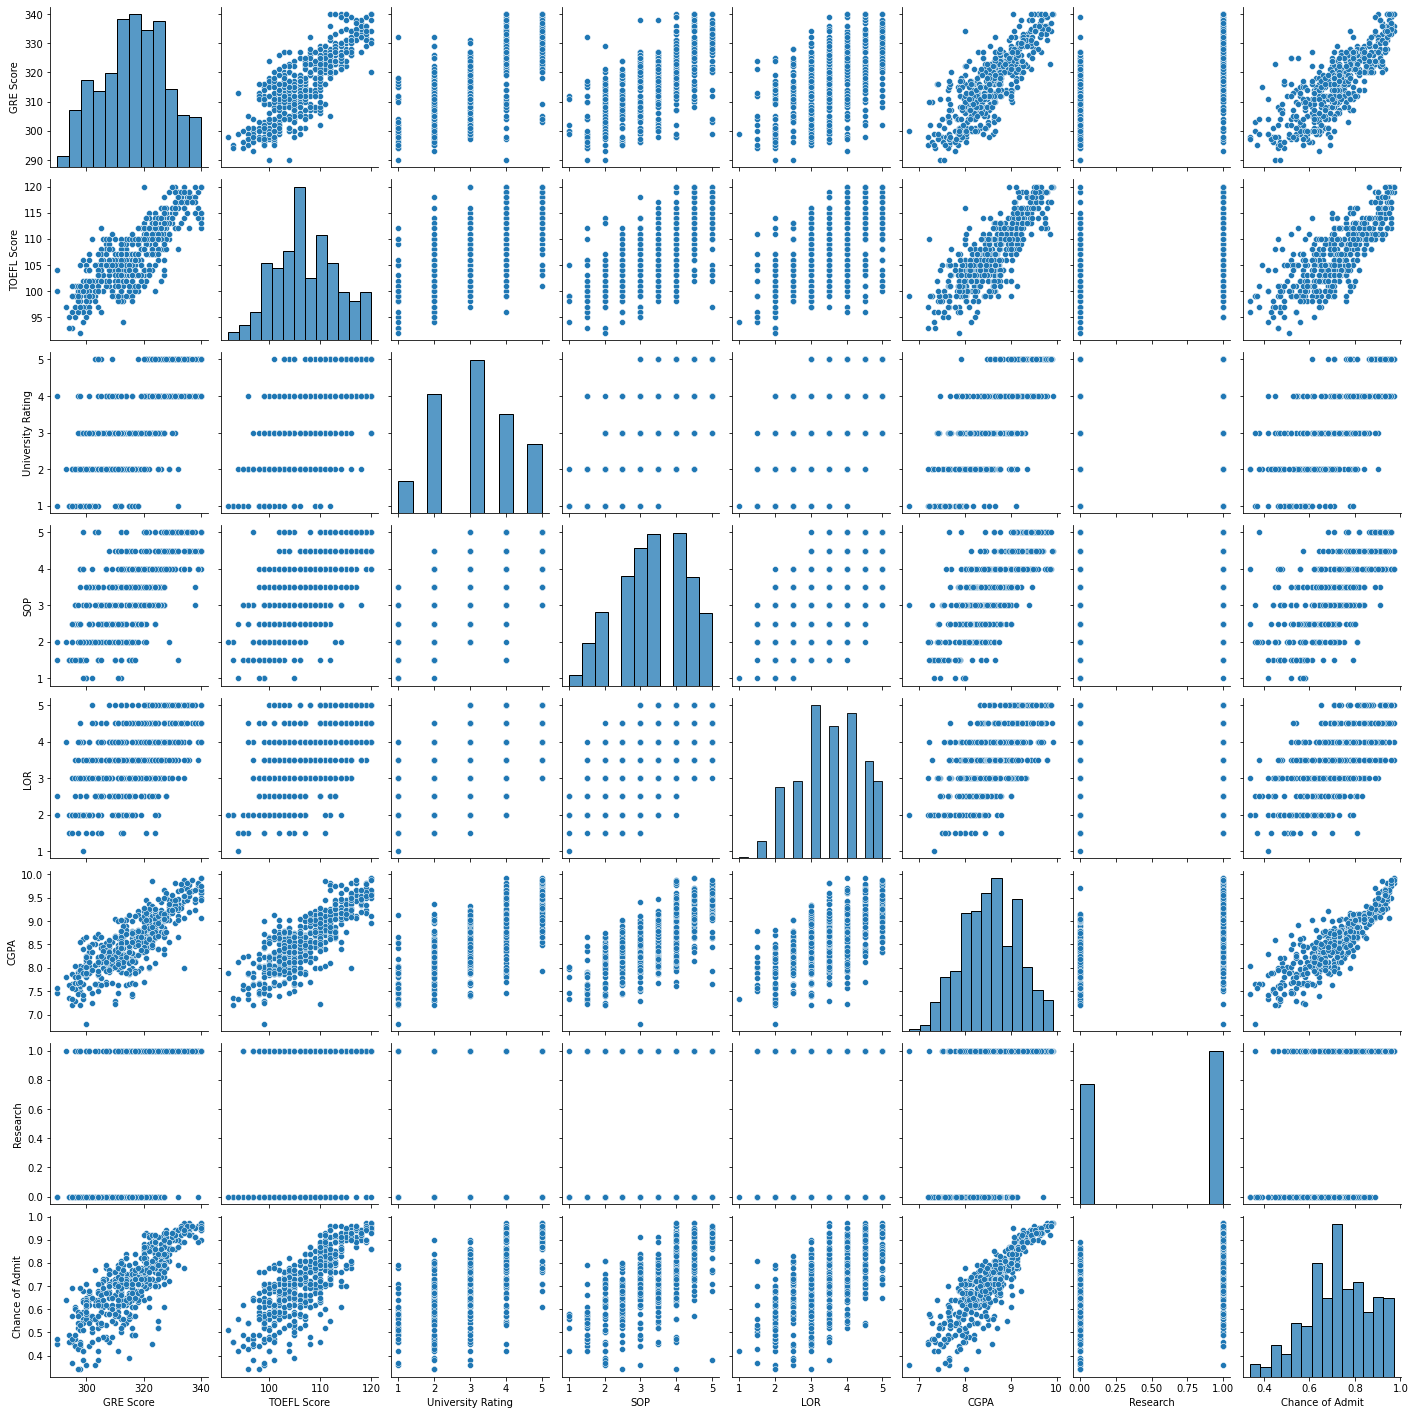

In [6]:
sns.pairplot(df)

In [7]:
# extracting x and y
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# First Model : MLR -Multiple Linear Regrresion

In [8]:
# we are splitting x and y into training set and the test set
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.25,random_state = 0)
print("Shape of x_train :", x_tr.shape)
print("Shape of x_test :", x_te.shape)
print("Shape of y_train :", y_tr.shape)
print("Shape of y_test :", y_te.shape)

Shape of x_train : (375, 7)
Shape of x_test : (125, 7)
Shape of y_train : (375,)
Shape of y_test : (125,)


In [9]:
# creating and training the linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_tr,y_tr)

LinearRegression()

In [10]:
# predicting the values with the trained model
y_pred = lr.predict(x_te)

In [11]:
# printing the r^2 score and the erors of our trained model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MLR_mape=mean_absolute_error(y_te,y_pred)
MLR_mse = mean_squared_error(y_te,y_pred)
MLR_rss = r2_score(y_te,y_pred)
MLR_rmse = np.sqrt(MLR_mse)
print('Mean Absolute Error:',MLR_mape)
print('Mean Squared Error:',MLR_mse)
print('R-Square score:',MLR_rss)
print('Root Mean Squared Error:',MLR_rmse)

Mean Absolute Error: 0.045980261896324606
Mean Squared Error: 0.003820408871044364
R-Square score: 0.797333461633815
Root Mean Squared Error: 0.06180945616201751


In [12]:
x_copy = x[:,:]
print(x_copy)

[[337.   118.     4.   ...   4.5    9.65   1.  ]
 [324.   107.     4.   ...   4.5    8.87   1.  ]
 [316.   104.     3.   ...   3.5    8.     1.  ]
 ...
 [330.   120.     5.   ...   5.     9.56   1.  ]
 [312.   103.     4.   ...   5.     8.43   0.  ]
 [327.   113.     4.   ...   4.5    9.04   0.  ]]


In [13]:
# creating the constant column using numpy library
const = np.ones((500,1)).astype(int)
print(const)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]


In [14]:
# appending the const column in the x_copy
# for the axis argument we use 0 if we want to join the two array row wise or horizontally
# axis = 1 is to join the two arrays vertically or column wise
x_copy = np.append(arr = const, values=x_copy, axis=1)
print(x_copy)

[[  1.   337.   118.   ...   4.5    9.65   1.  ]
 [  1.   324.   107.   ...   4.5    8.87   1.  ]
 [  1.   316.   104.   ...   3.5    8.     1.  ]
 ...
 [  1.   330.   120.   ...   5.     9.56   1.  ]
 [  1.   312.   103.   ...   5.     8.43   0.  ]
 [  1.   327.   113.   ...   4.5    9.04   0.  ]]


In [15]:
# i am creating another copy of the x_copy array which will contain the final most optimal columns
x_opt = np.array(x_copy[:,[0,1,2,3,4,5,6,7]],dtype = float)

In [16]:
# importing the library which help us to calculate the p-values of the columns
import statsmodels.api as sm
p_val = sm.OLS(endog= y,exog = x_opt).fit()
p_val.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Tue, 22 Sep 2020   Prob (F-statistic):          8.21e-180
Time:                        23:18:23   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2757      0.104    -12.232      0.000      -1.481      -1.071
x1             0.0019      0.001      3.700      0.000       0.001       0.003
x2             0.0028      0.001      3.184      0.002       0.001       0.004
x3             0.0059      0.004      1.563      0.119      -0.002       0.013
x4             0.0016      0.005      0.348      0.728      -0.007       0.011
x5             0.0169      0.004      4.074      0.000       0.009       0.025
x6             0.1184      0.010     12.198      0.000       0.099       0.137
x7             0.0243      0.007      3.680      0.000       0.011       0.037
==============================================================================
Omnibus:                      112.770   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.104
Skew:                          -1.160   Prob(JB):                     1.22e-57
Kurtosis:                       5.684   Cond. No.                     1.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
x_opt = np.array(x_copy[:,[0,1,2,3,5,6,7]],dtype = float)
p_val = sm.OLS(endog= y,exog = x_opt).fit()
p_val.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     379.1
Date:                Tue, 22 Sep 2020   Prob (F-statistic):          4.29e-181
Time:                        23:18:23   Log-Likelihood:                 701.32
No. Observations:                 500   AIC:                            -1389.
Df Residuals:                     493   BIC:                            -1359.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2800      0.103    -12.371      0.000      -1.483      -1.077
x1             0.0019      0.001      3.694      0.000       0.001       0.003
x2             0.0028      0.001      3.236      0.001       0.001       0.005
x3             0.0064      0.004      1.820      0.069      -0.001       0.013
x4             0.0173      0.004      4.380      0.000       0.010       0.025
x5             0.1190      0.010     12.481      0.000       0.100       0.138
x6             0.0244      0.007      3.691      0.000       0.011       0.037
==============================================================================
Omnibus:                      111.782   Durbin-Watson:                   0.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.656
Skew:                          -1.152   Prob(JB):                     6.82e-57
Kurtosis:                       5.667   Cond. No.                     1.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
x_opt = np.array(x_copy[:,[0,1,2,5,6,7]],dtype = float)
p_val = sm.OLS(endog= y,exog = x_opt).fit()
p_val.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     452.1
Date:                Tue, 22 Sep 2020   Prob (F-statistic):          9.97e-182
Time:                        23:18:23   Log-Likelihood:                 699.65
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     494   BIC:                            -1362.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3357      0.099    -13.482      0.000      -1.530      -1.141
x1             0.0019      0.001      3.760      0.000       0.001       0.003
x2             0.0030      0.001      3.501      0.001       0.001       0.005
x3             0.0193      0.004      5.092      0.000       0.012       0.027
x4             0.1230      0.009     13.221      0.000       0.105       0.141
x5             0.0252      0.007      3.814      0.000       0.012       0.038
==============================================================================
Omnibus:                      109.027   Durbin-Watson:                   0.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.874
Skew:                          -1.130   Prob(JB):                     9.07e-55
Kurtosis:                       5.615   Cond. No.                     1.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
x_opt = np.array(x_copy[:,[0,1,5,6,7]],dtype = float)
p_val = sm.OLS(endog= y,exog = x_opt).fit()
p_val.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     549.6
Date:                Tue, 22 Sep 2020   Prob (F-statistic):          1.69e-180
Time:                        23:18:23   Log-Likelihood:                 693.52
No. Observations:                 500   AIC:                            -1377.
Df Residuals:                     495   BIC:                            -1356.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3732      0.100    -13.787      0.000      -1.569      -1.178
x1             0.0027      0.000      6.047      0.000       0.002       0.004
x2             0.0202      0.004      5.283      0.000       0.013       0.028
x3             0.1343      0.009     15.236      0.000       0.117       0.152
x4             0.0243      0.007      3.644      0.000       0.011       0.037
==============================================================================
Omnibus:                      101.603   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.839
Skew:                          -1.065   Prob(JB):                     5.53e-50
Kurtosis:                       5.521   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
print(x_opt)

[[  1.   337.     4.5    9.65   1.  ]
 [  1.   324.     4.5    8.87   1.  ]
 [  1.   316.     3.5    8.     1.  ]
 ...
 [  1.   330.     5.     9.56   1.  ]
 [  1.   312.     5.     8.43   0.  ]
 [  1.   327.     4.5    9.04   0.  ]]


In [21]:
# splitting the x_opt and y into training and test set for our MLR model
xtr,xte,ytr,yte = train_test_split(x_opt,y,test_size = 0.2,random_state=0)

In [22]:
# train my MLR model
opt_reg = LinearRegression()
opt_reg.fit(xtr,ytr)

LinearRegression()

In [23]:
y_pr = opt_reg.predict(xte)

In [24]:
MLR_mape_final=mean_absolute_error(yte,y_pr)
MLR_mse_final = mean_squared_error(yte,y_pr)
MLR_rss_final = r2_score(yte,y_pr)
MLR_rmse_final = np.sqrt(MLR_mse_final)
print('Mean Absolute Error of MLR:',MLR_mape_final)
print('Mean Squared Error of MLR:',MLR_mse_final)
print('R-Square score of MLR:',MLR_rss_final)
print('Root Mean Squared Error of MLR:',MLR_rmse_final)

Mean Absolute Error of MLR: 0.04898626201810032
Mean Squared Error of MLR: 0.004212035934083985
R-Square score of MLR: 0.7588264398812473
Root Mean Squared Error of MLR: 0.06490019980003131


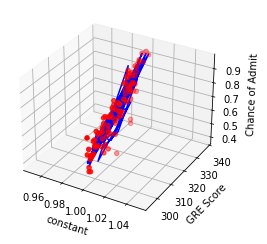

In [25]:
from mpl_toolkits import mplot3d
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(xte[:,0],xte[:,1],yte,c='red')
ax.plot3D(xte[:,0],xte[:,1],y_pr,c='blue')
ax.set_xlabel('constant')
ax.set_ylabel('GRE Score')
ax.set_zlabel('Chance of Admit')
plt.show()

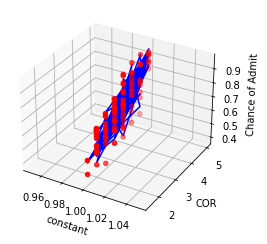

In [26]:
from mpl_toolkits import mplot3d
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(xte[:,0],xte[:,2],yte,c='red')
ax.plot3D(xte[:,0],xte[:,2],y_pr,c='blue')
ax.set_xlabel('constant')
ax.set_ylabel('COR')
ax.set_zlabel('Chance of Admit')
plt.show()

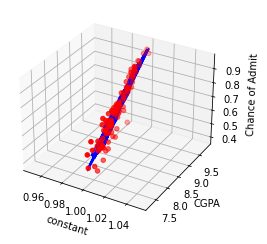

In [27]:
from mpl_toolkits import mplot3d
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(xte[:,0],xte[:,3],yte,c='red')
ax.plot3D(xte[:,0],xte[:,3],y_pr,c='blue')
ax.set_xlabel('constant')
ax.set_ylabel('CGPA')
ax.set_zlabel('Chance of Admit')
plt.show()

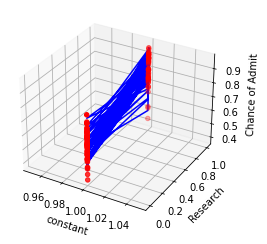

In [28]:
from mpl_toolkits import mplot3d
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(xte[:,0],xte[:,4],yte,c='red')
ax.plot3D(xte[:,0],xte[:,4],y_pr,c='blue')
ax.set_xlabel('constant')
ax.set_ylabel('Research')
ax.set_zlabel('Chance of Admit')
plt.show()

# Second Model : RFR - Random Forest Regrresion

In [29]:
# splitting x and y into training set and test set
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.2,random_state=0)

In [30]:
# importing and training the ml algorithm for random forest regression
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
rf.fit(x_tr,y_tr)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [31]:
# predicting the future values
y_pred=rf.predict(x_te)
print(y_pred)

[0.65456 0.84813 0.78278 0.87771 0.63318 0.665   0.52438 0.67115 0.55864
 0.71158 0.61054 0.72092 0.65321 0.78547 0.88774 0.52739 0.81195 0.66058
 0.74768 0.54537 0.47921 0.73134 0.53744 0.93072 0.86165 0.70578 0.6504
 0.5342  0.61924 0.63461 0.71099 0.44512 0.64651 0.83273 0.60358 0.55419
 0.8401  0.90182 0.65093 0.69242 0.68279 0.90898 0.88497 0.69861 0.75622
 0.80129 0.96105 0.80714 0.59482 0.68373 0.66872 0.65309 0.64894 0.79741
 0.70291 0.84419 0.51667 0.88538 0.63556 0.68401 0.41362 0.9202  0.64259
 0.94638 0.73426 0.66744 0.73617 0.83777 0.50865 0.73861 0.92374 0.77043
 0.69624 0.63149 0.80867 0.91572 0.75979 0.73846 0.55278 0.67306 0.61389
 0.89365 0.55239 0.69948 0.78384 0.55486 0.81216 0.67309 0.4682  0.62245
 0.71837 0.78678 0.67587 0.70045 0.63686 0.9316  0.57618 0.55302 0.65299
 0.65087]


In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
RFR_mape=mean_absolute_error(y_te,y_pred)
RFR_mse = mean_squared_error(y_te,y_pred)
RFR_rss = r2_score(y_te,y_pred)
RFR_rmse = np.sqrt(RFR_mse)
print('Mean Absolute Error of RFR:',RFR_mape)
print('Mean Squared Error of RFR:',RFR_mse)
print('R-Square score of RFR:',RFR_rss)
print('Root Mean Squared Error of RFR:',RFR_rmse)

Mean Absolute Error of RFR: 0.044312299999999916
Mean Squared Error of RFR: 0.004166018243000015
R-Square score of RFR: 0.7614613296497221
Root Mean Squared Error of RFR: 0.0645446995732416


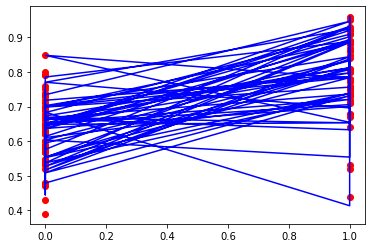

In [33]:
plt.scatter(x_te[:,-1],y_te,c='red')
plt.plot(x_te[:,-1],y_pred,c='blue')
plt.show()

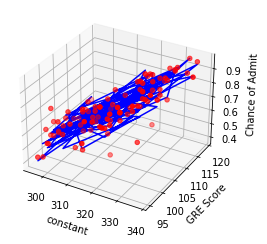

In [34]:
# 3D plotting
from mpl_toolkits import mplot3d
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(x_te[:,0],x_te[:,1],y_te,c='red')
ax.plot3D(x_te[:,0],x_te[:,1],y_pred,c='blue')
ax.set_xlabel('constant')
ax.set_ylabel('GRE Score')
ax.set_zlabel('Chance of Admit')
plt.show()

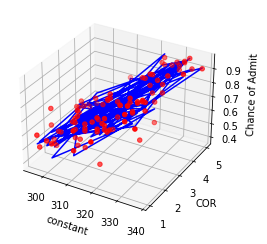

In [35]:
# 3D plotting
from mpl_toolkits import mplot3d
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(x_te[:,0],x_te[:,2],y_te,c='red')
ax.plot3D(x_te[:,0],x_te[:,2],y_pred,c='blue')
ax.set_xlabel('constant')
ax.set_ylabel('COR')
ax.set_zlabel('Chance of Admit')
plt.show()

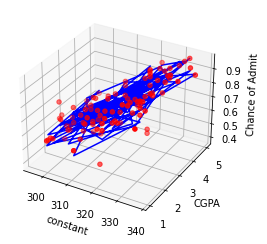

In [36]:
# 3D plotting
from mpl_toolkits import mplot3d
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(x_te[:,0],x_te[:,3],y_te,c='red')
ax.plot3D(x_te[:,0],x_te[:,3],y_pred,c='blue')
ax.set_xlabel('constant')
ax.set_ylabel('CGPA')
ax.set_zlabel('Chance of Admit')
plt.show()

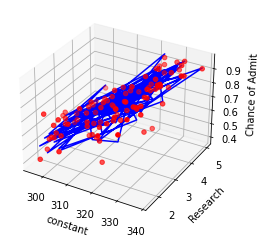

In [37]:
# 3D plotting
from mpl_toolkits import mplot3d
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(x_te[:,0],x_te[:,4],y_te,c='red')
ax.plot3D(x_te[:,0],x_te[:,4],y_pred,c='blue')
ax.set_xlabel('constant')
ax.set_ylabel('Research')
ax.set_zlabel('Chance of Admit')
plt.show()

# Third Model : MLR with PCA

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
x = pca.fit_transform(x)
var = pca.explained_variance_ratio_
print(var)

[0.67519343]


In [40]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_tr,y_tr)
y_pred = lr.predict(x_te)

In [42]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MLR_PCA_mape=mean_absolute_error(y_te,y_pred)
MLR_PCA_mse = mean_squared_error(y_te,y_pred)
MLR_PCA_rss = r2_score(y_te,y_pred)
MLR_PCA_rmse = np.sqrt(MLR_PCA_mse)
print('Mean Absolute Error of MLR with PCA:',MLR_PCA_mape)
print('Mean Squared Error of MLR with PCA:',MLR_PCA_mse)
print('R-Square score of MLR with PCA:',MLR_PCA_rss)
print('Root Mean Squared Error of MLR with PCA:',MLR_PCA_rmse)

Mean Absolute Error of MLR with PCA: 0.053515532632163874
Mean Squared Error of MLR with PCA: 0.0047283791747346655
R-Square score of MLR with PCA: 0.729261559728329
Root Mean Squared Error of MLR with PCA: 0.06876321091059277


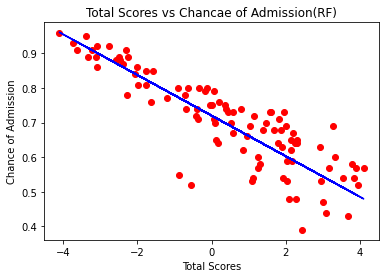

In [43]:
plt.scatter(x_te[:,0],y_te,c = 'red')
plt.plot(x_te[:,0],y_pred, c= 'blue')
plt.xlabel('Total Scores')
plt.ylabel('Chance of Admission')
plt.title('Total Scores vs Chancae of Admission(RF)')
plt.show()

# Fourth Model : RFR with PCA

In [44]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.2,random_state = 0)
print(x_tr)
print(y_tr)

[[-3.01716852e+00]
 [ 4.54138011e-01]
 [-3.93071487e+00]
 [ 8.45835118e-01]
 [-2.85144994e-01]
 [ 1.26012296e+00]
 [ 1.50220743e-01]
 [-2.21418669e+00]
 [ 5.44892104e-01]
 [ 6.52486727e-01]
 [ 4.76982432e+00]
 [ 1.83445617e+00]
 [ 1.80982813e+00]
 [ 3.57630206e+00]
 [ 1.45481649e+00]
 [-2.21977570e+00]
 [ 3.09658273e+00]
 [-3.48072326e+00]
 [-1.87991759e+00]
 [-2.91369488e+00]
 [ 2.50706898e-01]
 [-1.10682685e+00]
 [-2.79090364e+00]
 [-2.15610706e+00]
 [ 1.31839654e+00]
 [ 3.89884577e+00]
 [ 2.38987286e+00]
 [ 4.28350380e-01]
 [ 1.05238566e+00]
 [ 3.09061282e+00]
 [ 1.22091347e+00]
 [-1.04908262e+00]
 [-1.60451441e+00]
 [ 1.45240410e+00]
 [ 1.62958125e+00]
 [ 8.77654102e-01]
 [ 1.44789125e+00]
 [ 4.32442987e+00]
 [-1.33673348e-02]
 [-1.63246589e-01]
 [ 2.66358862e-01]
 [-1.42167481e+00]
 [-1.18308582e-01]
 [-1.22368931e+00]
 [-8.11687735e-01]
 [ 2.03580394e+00]
 [ 2.66533193e-03]
 [ 1.47907917e+00]
 [-1.33388311e+00]
 [-2.67623380e+00]
 [-2.14067282e+00]
 [ 1.78790618e+00]
 [-9.6186042

In [45]:
from sklearn.ensemble import RandomForestRegressor
y_pred = []
c = np.array([[-3.01716852e+00]])  

for i in range(1,101):        #checking for n_estimator as for -3.01716852e+00 value of n_estimator should be nearer to 0.91
    rfr = RandomForestRegressor(n_estimators=i,random_state=0)
    rfr.fit(x_tr,y_tr)
    y_pred.append(rfr.predict(c))
print(y_pred)

[array([0.91]), array([0.91]), array([0.90666667]), array([0.905]), array([0.906]), array([0.90666667]), array([0.90714286]), array([0.90625]), array([0.90666667]), array([0.907]), array([0.90636364]), array([0.90666667]), array([0.90692308]), array([0.90571429]), array([0.906]), array([0.90625]), array([0.90588235]), array([0.90555556]), array([0.90421053]), array([0.907]), array([0.90714286]), array([0.90681818]), array([0.90695652]), array([0.90708333]), array([0.9072]), array([0.90730769]), array([0.90740741]), array([0.9075]), array([0.90931034]), array([0.90933333]), array([0.90903226]), array([0.9090625]), array([0.90909091]), array([0.90911765]), array([0.90914286]), array([0.90916667]), array([0.90918919]), array([0.91052632]), array([0.91051282]), array([0.91175]), array([0.91170732]), array([0.91166667]), array([0.91139535]), array([0.91136364]), array([0.91111111]), array([0.91108696]), array([0.91106383]), array([0.91104167]), array([0.91102041]), array([0.911]), array([0.

In [46]:
#By checking above we can say n_estimator=39 works best i.e we want 0.91 therefore
# 0.91-0.90918919=0.00081081
#0.91-0.91052632=-0.00052632
#0.91-0.91051282=-0.00051282  THIS VALUE IS MORE NEARER THREFORE n_estimator =39 is best
rfr = RandomForestRegressor(n_estimators=39,random_state=0)
rfr.fit(x_tr,y_tr)
y_pred = rfr.predict(x_te)
print(y_pred)
forest_score=(rfr.score(x_te,y_te))*100
forest_score

[0.71333333 0.82179487 0.76512821 0.8925641  0.58769231 0.68179487
 0.49512821 0.66948718 0.51179487 0.72076923 0.65820513 0.69025641
 0.47076923 0.79897436 0.92333333 0.51128205 0.81051282 0.67358974
 0.74769231 0.43179487 0.58153846 0.77487179 0.51820513 0.94
 0.89384615 0.70051282 0.70487179 0.56974359 0.47076923 0.46333333
 0.64589744 0.50615385 0.58512821 0.86769231 0.66615385 0.71
 0.83717949 0.87025641 0.65102564 0.67564103 0.53435897 0.92589744
 0.88358974 0.74692308 0.73538462 0.81897436 0.94102564 0.82179487
 0.55564103 0.66512821 0.64974359 0.66205128 0.64974359 0.76820513
 0.72076923 0.86       0.50102564 0.85897436 0.58666667 0.64102564
 0.51923077 0.90564103 0.64948718 0.91820513 0.66564103 0.58948718
 0.75615385 0.81051282 0.51205128 0.64076923 0.9125641  0.78461538
 0.59717949 0.71128205 0.78717949 0.93282051 0.78153846 0.77487179
 0.65461538 0.46307692 0.57205128 0.82410256 0.56897436 0.64538462
 0.79641026 0.41692308 0.79846154 0.4625641  0.50846154 0.67769231
 0.6615

54.1725274199588

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
RFR_PCA_mape=mean_absolute_error(y_te,y_pred)
RFR_PCA_mse = mean_squared_error(y_te,y_pred)
RFR_PCA_rss = r2_score(y_te,y_pred)
RFR_PCA_rmse = np.sqrt(RFR_PCA_mse)
print('Mean Absolute Error of RFR with PCA:',RFR_PCA_mape)
print('Mean Squared Error of RFR with PCA:',RFR_PCA_mse)
print('R-Square score of RFR with PCA:',RFR_PCA_rss)
print('Root Mean Squared Error of RFR with PCA:',RFR_PCA_rmse)

Mean Absolute Error of RFR with PCA: 0.06293589743589739
Mean Squared Error of RFR with PCA: 0.008003653517422748
R-Square score of RFR with PCA: 0.5417252741995879
Root Mean Squared Error of RFR with PCA: 0.08946314055197675


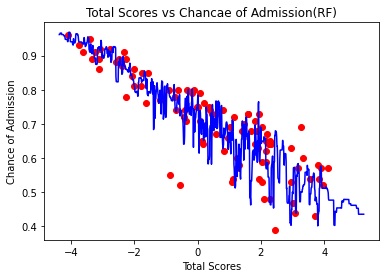

In [48]:
x_grid = np.arange(min(x),max(x),0.01)
x_grid = x_grid.reshape(len(x_grid),1)
plt.scatter(x_te,y_te,c='red')
plt.plot(x_grid,rfr.predict(x_grid),c='blue')
#plt.plot(x_te,y_pred,c='green')
plt.xlabel('Total Scores')
plt.ylabel('Chance of Admission')
plt.title('Total Scores vs Chancae of Admission(RF)')
plt.show()

# Comparing the RSS : R-Squre Scores

c:\users\rdrl\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Accuracy')

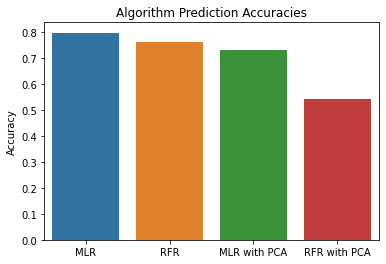

In [49]:
Models=['MLR','RFR','MLR with PCA','RFR with PCA']
Scores=np.array([MLR_rss,RFR_rss,MLR_PCA_rss,RFR_PCA_rss])
sns.barplot(Models,Scores)
plt.title('Algorithm Prediction Accuracies')
plt.ylabel('Accuracy')

# Comparing the RMSE : Root Mean Squred Error

c:\users\rdrl\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Accuracy')

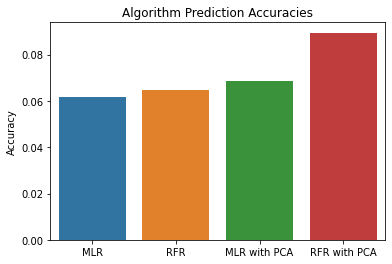

In [50]:
Models=['MLR','RFR','MLR with PCA','RFR with PCA']
Scores=np.array([MLR_rmse,RFR_rmse,MLR_PCA_rmse,RFR_PCA_rmse])
sns.barplot(Models,Scores)
plt.title('Algorithm Prediction Accuracies')
plt.ylabel('Accuracy')

# Comparing the MSE : Mean Squred Error

c:\users\rdrl\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Accuracy')

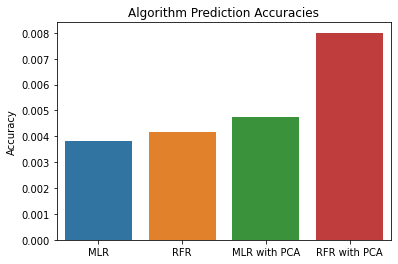

In [51]:
Models=['MLR','RFR','MLR with PCA','RFR with PCA']
Scores=np.array([MLR_mse,RFR_mse,MLR_PCA_mse,RFR_PCA_mse])
sns.barplot(Models,Scores)
plt.title('Algorithm Prediction Accuracies')
plt.ylabel('Accuracy')

# Conclusion : It seems that Multiple Linear Regression is the most accurate in the 4 models and will be used to predict the future applicant's Chances of Admission